In [97]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
path_to_outdir = '../data/decomp/mSigAct/'

In [93]:
# collect distances of recontructed spectra after assignment
data_distances  = []
for distances_file in glob.glob(path_to_outdir + '*/*/*.distances.csv'):
    dist_df = pd.read_csv(distances_file, index_col=0).assign(
        params=distances_file.split('/')[-3],
        sample=distances_file.split('/')[-2],
    )
    data_distances.append(dist_df)
distances = pd.concat(data_distances)
distances.set_index(['params', 'sample']).to_csv('../data/decomp/mSigAct/distances.csv')
distances

,method,proposed.assignment,QP.assignment,params,sample
1,log.likelihood,-214.025737,-219.691405,prop05,low_Lepidosauria__Ts...Tv
2,MAP,-218.184620,-223.850288,prop05,low_Lepidosauria__Ts...Tv
3,euclidean,36.235203,33.816153,prop05,low_Lepidosauria__Ts...Tv
4,manhattan,245.922328,238.321763,prop05,low_Lepidosauria__Ts...Tv
5,cosine,0.882848,0.898676,prop05,low_Lepidosauria__Ts...Tv
...,...,...,...,...,...
1,log.likelihood,-255.503947,-256.212814,custom_prop,diff_Amphibia__Ts...Tv
2,MAP,-265.625011,-266.333878,custom_prop,diff_Amphibia__Ts...Tv
3,euclidean,83.523636,82.770844,custom_prop,diff_Amphibia__Ts...Tv
4,manhattan,460.371359,448.168894,custom_prop,diff_Amphibia__Ts...Tv


In [100]:
distances[distances.method == 'cosine']

,method,proposed.assignment,QP.assignment,params,sample
5,cosine,0.882848,0.898676,prop05,low_Lepidosauria__Ts...Tv
5,cosine,0.818889,0.862405,prop05,diff_Aves__Ts.only
5,cosine,0.879973,0.882151,prop05,low_Aves__Ts...Tv
5,cosine,0.857012,0.912086,prop05,high_Mammalia__Ts.only
5,cosine,0.878813,0.895674,prop05,diff_Actinopterygii__Ts.only
...,...,...,...,...,...
5,cosine,0.825324,0.885563,custom_prop,high_Aves__Ts.only
5,cosine,0.874527,0.889694,custom_prop,high_Lepidosauria__Ts...Tv
5,cosine,0.900963,0.922995,custom_prop,high_Amphibia__Ts.only
5,cosine,0.886165,0.898553,custom_prop,diff_Mammalia__Ts...Tv


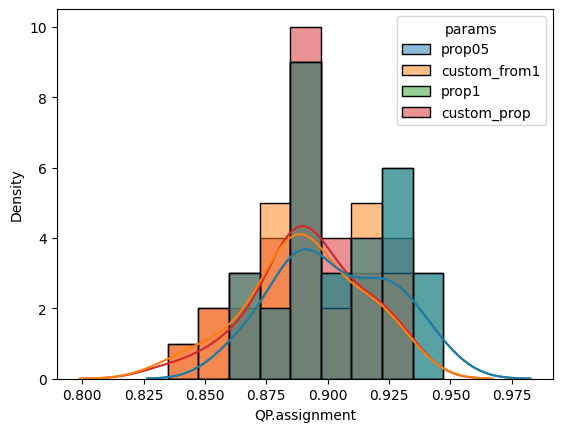

In [117]:
# prop1 == prop05
sns.kdeplot(data=distances[(distances.method == 'cosine')].reset_index(), x='QP.assignment', hue='params');
sns.histplot(data=distances[(distances.method == 'cosine')].reset_index(), x='QP.assignment', hue='params');

In [143]:
try_act_df

,low_Lepidosauria__Ts...Tv,diff_Aves__Ts.only,low_Aves__Ts...Tv,high_Mammalia__Ts.only,diff_Actinopterygii__Ts.only,low_Actinopterygii__Ts...Tv,diff_Amphibia__Ts.only,high_Mammalia__Ts...Tv,high_Lepidosauria__Ts.only,low_Amphibia__Ts...Tv,...,diff_Mammalia__Ts.only,low_Aves__Ts.only,low_Actinopterygii__Ts.only,diff_Lepidosauria__Ts.only,high_Aves__Ts.only,high_Lepidosauria__Ts...Tv,high_Amphibia__Ts.only,diff_Mammalia__Ts...Tv,diff_Amphibia__Ts...Tv,params
SBS5,210.0,NaN,208.0,NaN,NaN,285.0,NaN,NaN,NaN,273.0,...,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,207.0,custom_prop
SBS30,149.0,NaN,65.0,367.0,344.0,96.0,280.0,439.0,128.0,154.0,...,213.0,103.0,161.0,NaN,99.0,209.0,321.0,245.0,271.0,custom_prop
SBS12,87.0,748.0,49.0,569.0,275.0,122.0,280.0,738.0,503.0,89.0,...,489.0,94.0,169.0,397.0,810.0,613.0,396.0,639.0,287.0,custom_prop
SBS23,NaN,529.0,NaN,378.0,179.0,NaN,198.0,209.0,621.0,NaN,...,259.0,31.0,39.0,515.0,575.0,442.0,345.0,134.0,106.0,custom_prop
SBS2,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93.0,NaN,89.0,NaN,NaN,custom_prop
SBS44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,24.0,custom_prop


In [147]:
#collect activities after assignment
data_activities = []
for try_d in os.listdir(path_to_outdir):
    try_d_full_path = os.path.join(path_to_outdir, try_d)
    if os.path.isdir(try_d_full_path):
        print(try_d)
        d = []
        for activity_file in glob.glob(try_d_full_path + '/*/*.exposure.csv'):
            act_df = pd.read_csv(activity_file, index_col=0)
            d.append(act_df)
        try_act_df = pd.concat(d, axis=1).assign(params=try_d)
        print(try_act_df.iloc[:, -2:])
    data_activities.append(try_act_df)

activities = pd.concat(data_activities, axis=0)
activities.index.name = 'signature'
# activities = activities.reset_index().set_index(['params', 'signature'])
# activities.to_csv('../data/decomp/mSigAct/activities_total.csv')
activities

prop05
       diff_Amphibia__Ts...Tv  params
SBS5                      209  prop05
SBS12                     287  prop05
SBS30                     206  prop05
SBS23                     131  prop05
SBS2                       35  prop05
SBS44                      27  prop05
custom_from1
       diff_Amphibia__Ts...Tv        params
SBS5                    223.0  custom_from1
SBS30                   267.0  custom_from1
SBS12                   287.0  custom_from1
SBS23                   117.0  custom_from1
SBS2                      NaN  custom_from1
prop1
       diff_Amphibia__Ts...Tv params
SBS5                      209  prop1
SBS12                     287  prop1
SBS30                     206  prop1
SBS23                     131  prop1
SBS2                       35  prop1
SBS44                      27  prop1
custom_prop
       diff_Amphibia__Ts...Tv       params
SBS5                    207.0  custom_prop
SBS30                   271.0  custom_prop
SBS12                   287.0  custom_prop
S

,low_Lepidosauria__Ts...Tv,diff_Aves__Ts.only,low_Aves__Ts...Tv,high_Mammalia__Ts.only,diff_Actinopterygii__Ts.only,low_Actinopterygii__Ts...Tv,diff_Amphibia__Ts.only,high_Mammalia__Ts...Tv,high_Lepidosauria__Ts.only,low_Amphibia__Ts...Tv,...,diff_Mammalia__Ts.only,low_Aves__Ts.only,low_Actinopterygii__Ts.only,diff_Lepidosauria__Ts.only,high_Aves__Ts.only,high_Lepidosauria__Ts...Tv,high_Amphibia__Ts.only,diff_Mammalia__Ts...Tv,diff_Amphibia__Ts...Tv,params
signature,,,,,,,,,,,,,,,,,,,,,
SBS5,210.0,NaN,208.0,NaN,NaN,285.0,NaN,NaN,NaN,273.0,...,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,207.0,custom_prop
SBS30,149.0,NaN,65.0,367.0,344.0,96.0,280.0,439.0,128.0,154.0,...,213.0,103.0,161.0,NaN,99.0,209.0,321.0,245.0,271.0,custom_prop
SBS12,87.0,748.0,49.0,569.0,275.0,122.0,280.0,738.0,503.0,89.0,...,489.0,94.0,169.0,397.0,810.0,613.0,396.0,639.0,287.0,custom_prop
SBS23,NaN,529.0,NaN,378.0,179.0,NaN,198.0,209.0,621.0,NaN,...,259.0,31.0,39.0,515.0,575.0,442.0,345.0,134.0,106.0,custom_prop
SBS2,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93.0,NaN,89.0,NaN,NaN,custom_prop
SBS44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,24.0,custom_prop
SBS5,202.0,NaN,205.0,NaN,NaN,281.0,NaN,22.0,NaN,273.0,...,NaN,NaN,NaN,NaN,NaN,77.0,NaN,49.0,209.0,prop05
SBS12,91.0,761.0,49.0,566.0,275.0,122.0,280.0,722.0,503.0,89.0,...,488.0,94.0,169.0,398.0,810.0,617.0,396.0,604.0,287.0,prop05
SBS30,87.0,66.0,61.0,281.0,246.0,64.0,203.0,401.0,128.0,110.0,...,189.0,92.0,113.0,11.0,99.0,211.0,321.0,232.0,206.0,prop05


In [140]:
x = activities.mean(level=1).mean(axis=1)
x / x.sum()

/tmp/ipykernel_11006/3901794939.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  x = activities.mean(level=1).mean(axis=1)


signature
SBS5     0.145197
SBS30    0.208000
SBS12    0.377232
SBS23    0.214183
SBS2     0.038549
SBS44    0.016838
dtype: float64

In [ ]:
# from SigProfiler
# SBS5     0.18
# SBS30    0.33
# SBS12    0.38
# SBS23    0.03
# SBS2     0.01
# SBS44    0.06

In [130]:
d = activities.melt(ignore_index=False, var_name='sample', value_name='activity').reset_index()
d

,params,signature,sample,activity
0,custom_prop,SBS5,low_Lepidosauria__Ts...Tv,210.0
1,custom_prop,SBS30,low_Lepidosauria__Ts...Tv,149.0
2,custom_prop,SBS12,low_Lepidosauria__Ts...Tv,87.0
3,custom_prop,SBS23,low_Lepidosauria__Ts...Tv,NaN
4,custom_prop,SBS2,low_Lepidosauria__Ts...Tv,NaN
...,...,...,...,...
1525,custom_prop,SBS30,diff_Amphibia__Ts...Tv,271.0
1526,custom_prop,SBS12,diff_Amphibia__Ts...Tv,287.0
1527,custom_prop,SBS23,diff_Amphibia__Ts...Tv,106.0
1528,custom_prop,SBS2,diff_Amphibia__Ts...Tv,NaN


<AxesSubplot:xlabel='signature', ylabel='activity'>

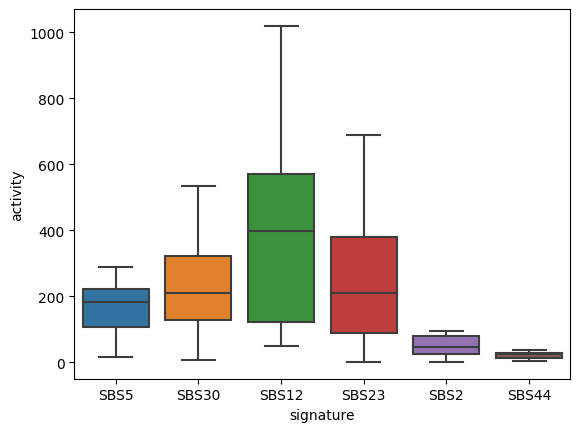

In [131]:
sns.boxplot(data=d, x='signature', y='activity')

<AxesSubplot:xlabel='sample', ylabel='activity'>

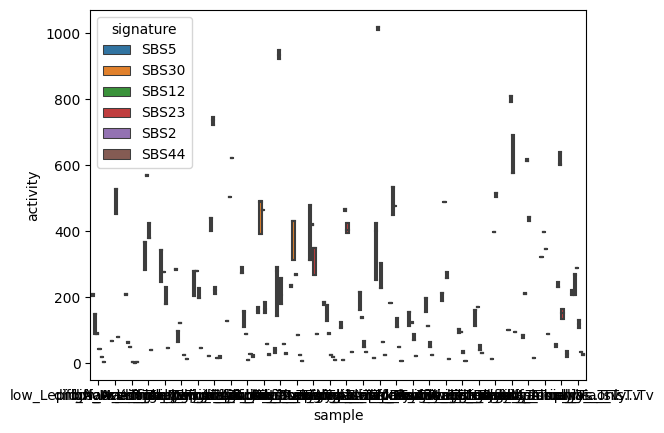

In [135]:
sns.boxplot(data=d, x='sample', y='activity', hue='signature')